Problem Statement- Bike-sharing system are meant to rent the bicycle and return to the different place for the bike sharing purpose in Washington DC. You are provided with rental data spanning for 2 years. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [7]:
df=pd.read_csv('train_bikes.csv', parse_dates=['datetime'])

In [8]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [10]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


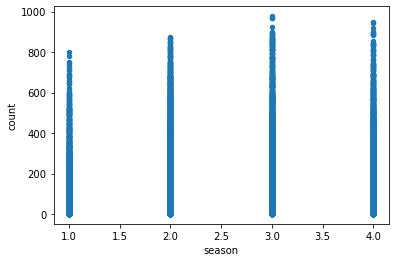

In [13]:
df.plot.scatter(x='season',y='count') #counts each season

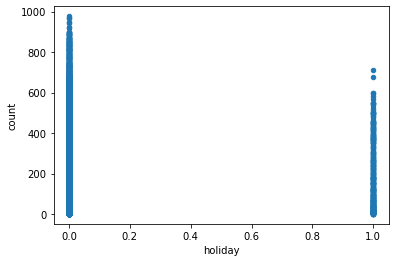

In [14]:
df.plot.scatter(x='holiday',y='count') #count based on holiday

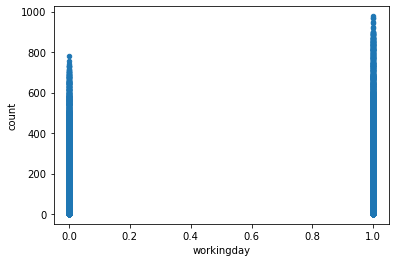

In [15]:
df.plot.scatter(x='workingday',y='count') #count based on working days

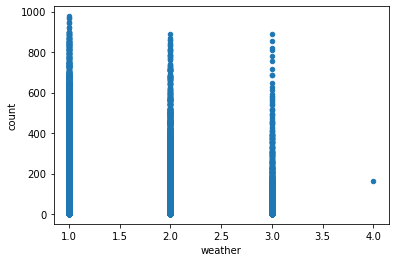

In [16]:
df.plot.scatter(x='weather',y='count') #count based on weather

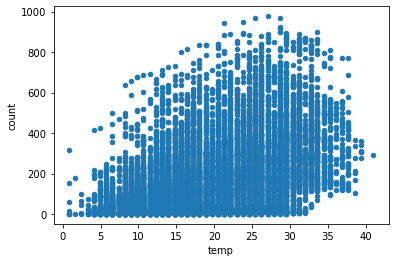

In [18]:
df.plot.scatter(x = 'temp', y = 'count') # counts based on the temparature

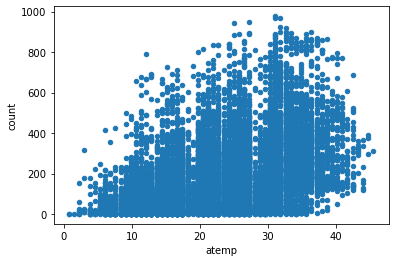

In [19]:
df.plot.scatter(x = 'atemp', y = 'count') # counts based on the atemp

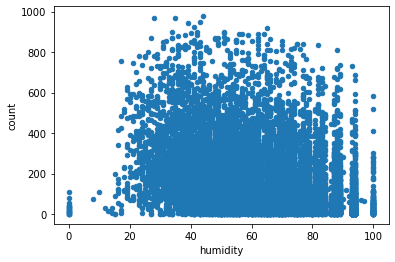

In [21]:
df.plot.scatter(x = 'humidity', y = 'count')# plotting the counts based on humidity

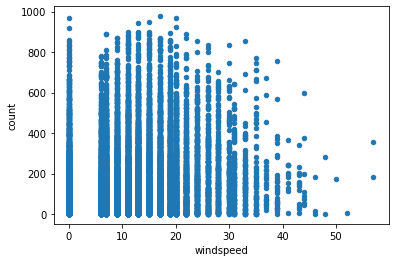

In [22]:
df.plot.scatter(x = 'windspeed', y = 'count')# plotting the counts based on windspeed

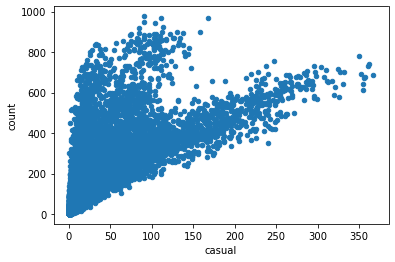

In [23]:
df.plot.scatter(x = 'casual', y = 'count')# plotting the counts based on casual

In [24]:
test = pd.read_csv('test_bikes.csv')

In [25]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [27]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


C:\Users\anzee\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  >>> df = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
C:\Users\anzee\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  >>> df = pd.DataFrame([[0, 2, 3], [0, 4, 1], [10, 20, 30]],


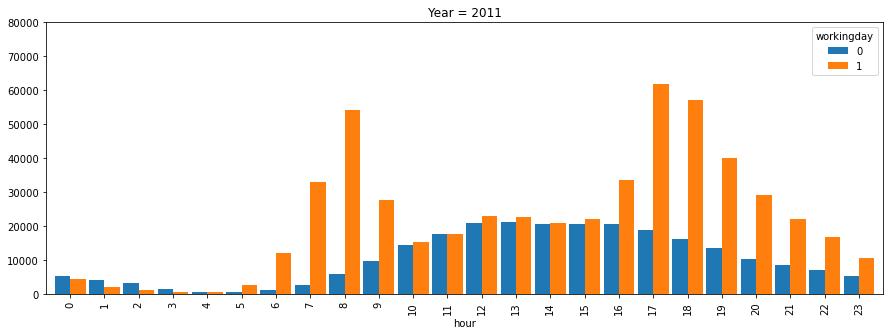

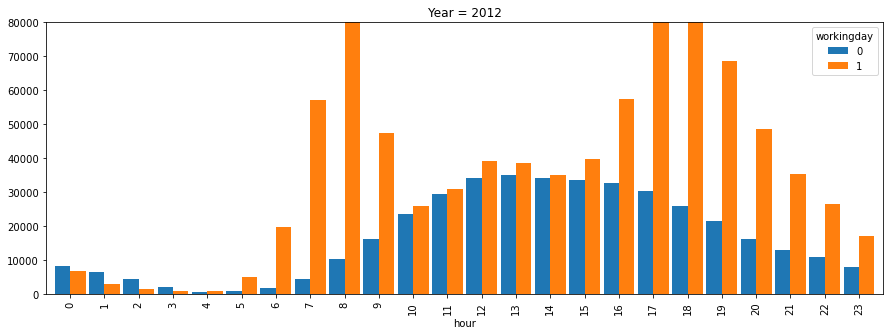

In [33]:
# method for creating the count plot based on hour for a given year 
def plot_by_hour(data, year=None, agg='sum'):
    d=data
    if year:
        d =d[d.datetime.dt.year==year]
    d.loc[:,('hour')]=d.datetime.dt.hour
    by_hour = d.groupby(['hour', 'workingday'])['count'].agg(agg).unstack()
    return by_hour.plot(kind='bar', ylim=(0, 80000), figsize=(15,5), width=0.9, title="Year = {0}".format(year))

plot_by_hour(df, year=2011)
plot_by_hour(df, year=2012)

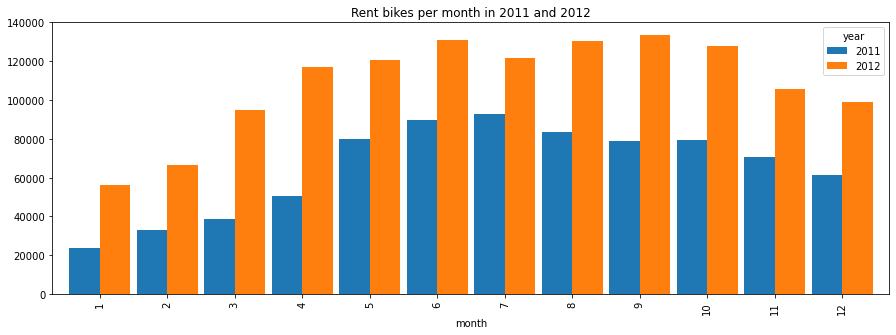

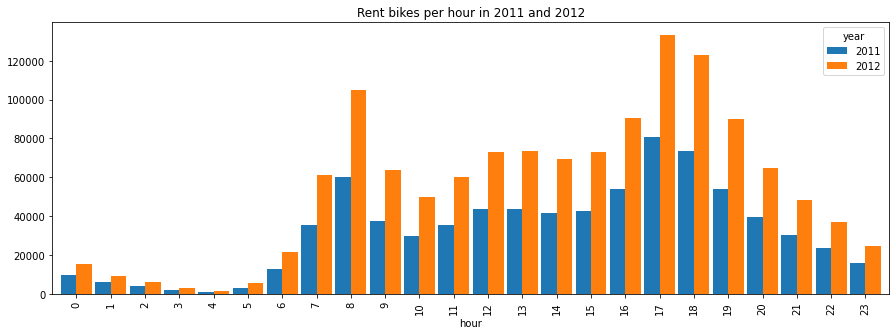

In [35]:
# method for creating the count plot based on year 
def plot_by_year(agg_attr, title):
    # extracting the required fields
    d = df.copy()
    d['year'] = df.datetime.dt.year # extratcing the year
    d['month'] = df.datetime.dt.month # extratcing the month
    d['hour'] = df.datetime.dt.hour # extratcing the hour
    
    by_year = d.groupby([agg_attr, 'year'])['count'].agg('sum').unstack() # groupby year
    return by_year.plot(kind='bar', figsize=(15,5), width=0.9, title=title) # returning the figure grouped by year


plot_by_year('month', "Rent bikes per month in 2011 and 2012") # plotting monthly bike rentals based on year
plot_by_year('hour', "Rent bikes per hour in 2011 and 2012") # plotting hourls bike rentals based  on year

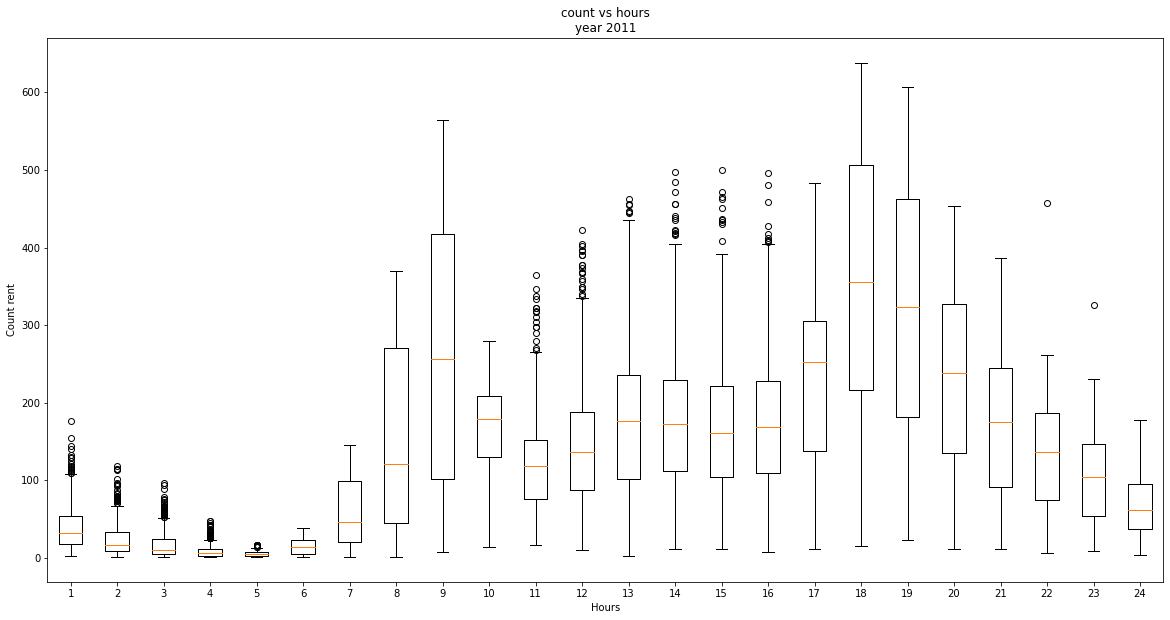

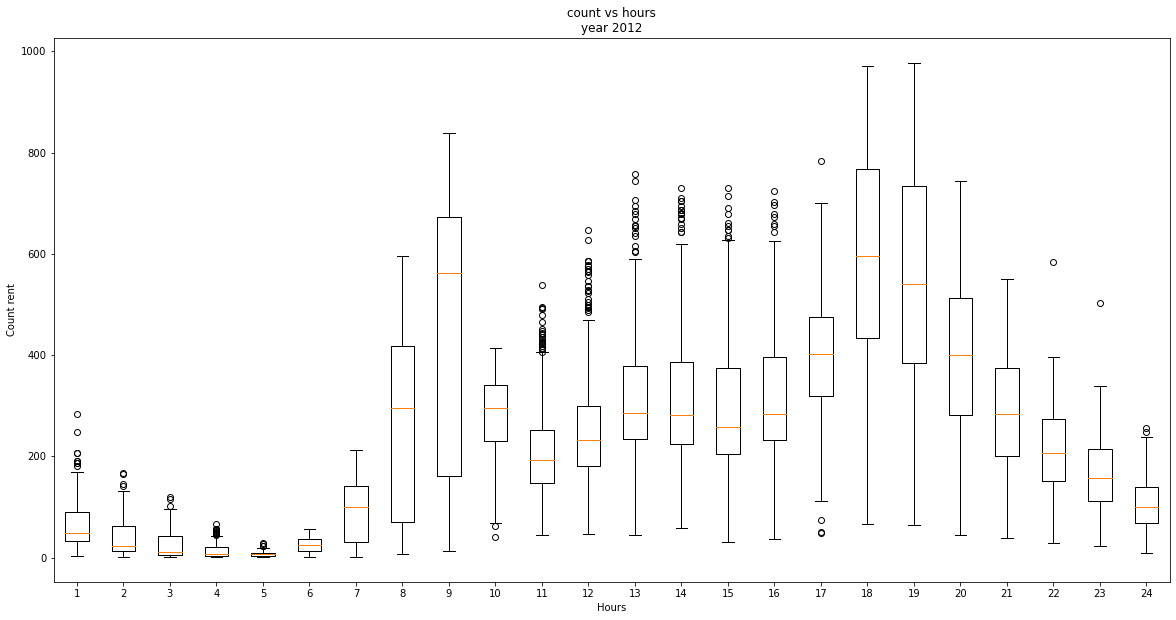

In [42]:
def plot_hours(data, message = ''):
    d=data.copy()
    d['hour'] = data.datetime.dt.hour
    hours={}
    for hour in range(24):
        hours[hour]=d[d.hour==hour]['count'].values
    
    plt.figure(figsize=(20,10))
    plt.ylabel("Count rent")
    plt.xlabel("Hours")
    plt.title("count vs hours\n" + message)
    plt.boxplot( [hours[hour] for hour in range(24)])
    
    
plot_hours( df[df.datetime.dt.year == 2011], 'year 2011') # box plot for hourly count for the mentioned year
plot_hours( df[df.datetime.dt.year == 2012], 'year 2012')    

In [43]:
h=pd.to_datetime(df['datetime'])
df['hour']=h.apply(lambda x:x.hour)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [44]:
h_test=pd.to_datetime(test['datetime'])
test['hour']=h_test.apply(lambda x:x.hour)
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4


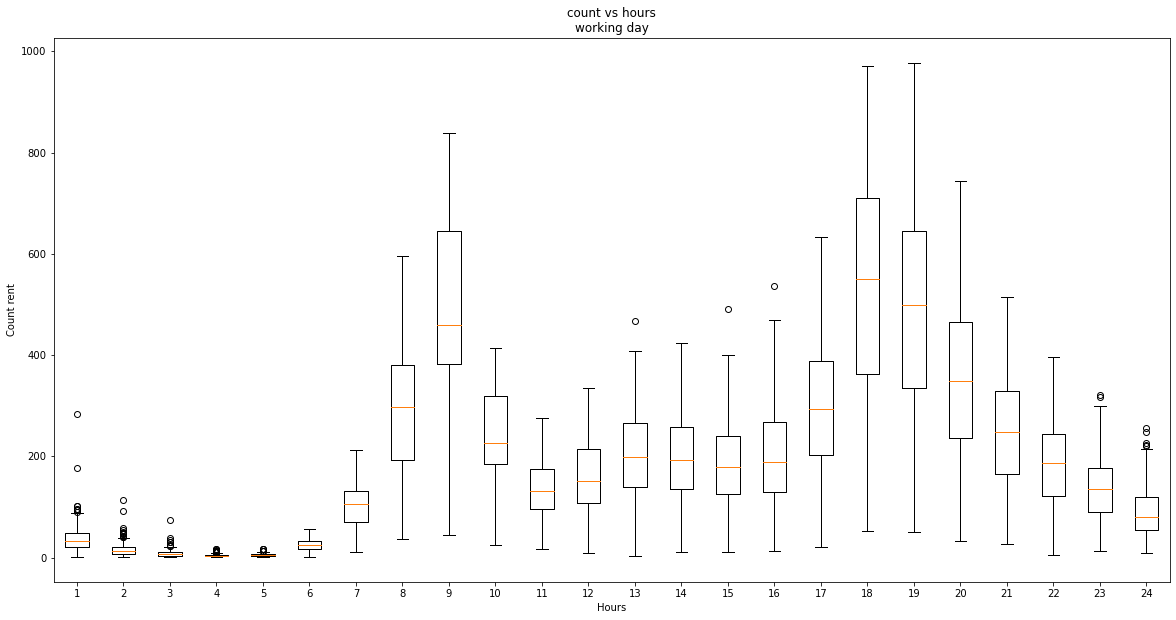

In [45]:
plot_hours( df[df.workingday == 1], 'working day') # plotting hourly count of rented bikes for working days for a given year

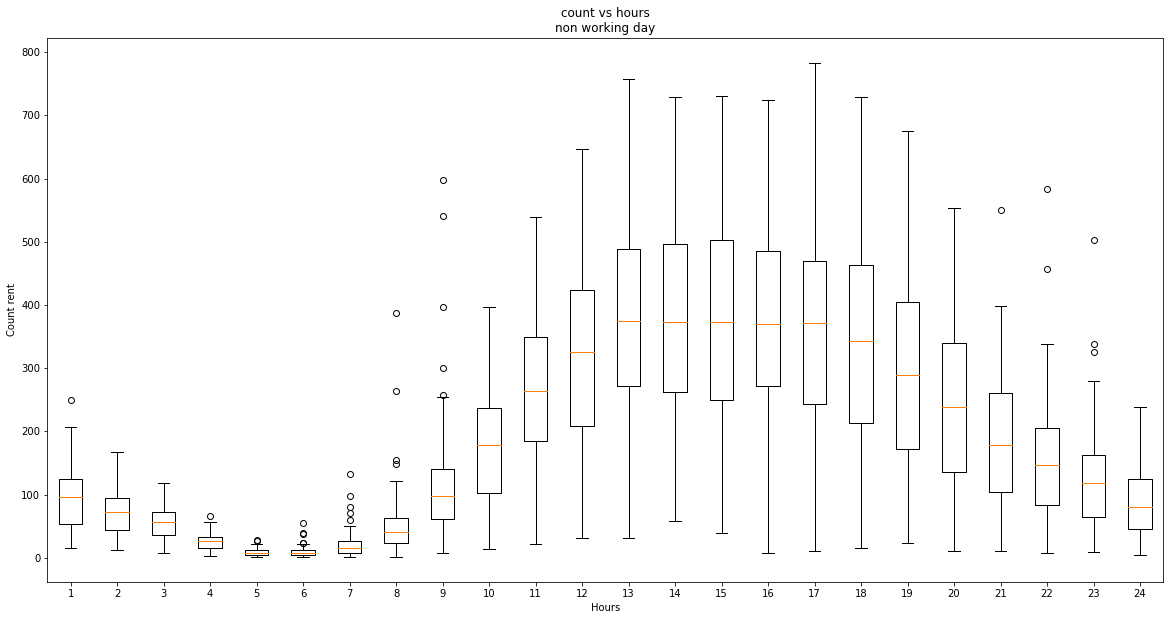

In [46]:
plot_hours( df[df.workingday == 0], 'non working day') # plotting hourly count of rented bikes for non-working days for a given year

In [47]:
# method to convert categorical data to numerical data
def categorical_to_numeric(x):
    if 0 <=  x < 6:
        return 0
    elif 6 <= x < 13:
        return 1
    elif 13 <= x < 19:
        return 2
    elif 19 <= x < 24:
        return 3

In [48]:
df['hour'] = df['hour'].apply(categorical_to_numeric)# applying the above conversion logic to training data
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0


In [49]:
test['hour'] = test['hour'].apply(categorical_to_numeric) # applying the above conversion logic to test data
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,0


In [51]:
df = df.drop(['datetime'], axis=1)
test = test.drop(['datetime'], axis=1)

In [53]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,0
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,0
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,0
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,0


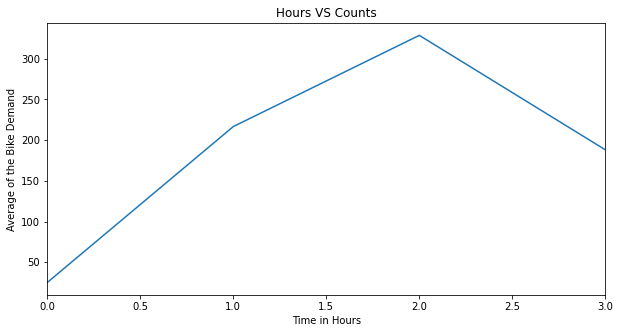

In [54]:
figure,axes = plt.subplots(figsize = (10, 5))
hours = df.groupby(["hour"]).agg("mean")["count"]  
hours.plot(kind="line", ax=axes) 
plt.title('Hours VS Counts')
axes.set_xlabel('Time in Hours')
axes.set_ylabel('Average of the Bike Demand')
plt.show()

In [57]:
t = df.groupby('temp')[['count']].mean()
t

,count
temp,
0.82,77.714286
1.64,91.500000
2.46,43.000000
3.28,19.272727
4.10,50.272727
4.92,58.416667
5.74,53.233645
6.56,68.109589
7.38,67.754717


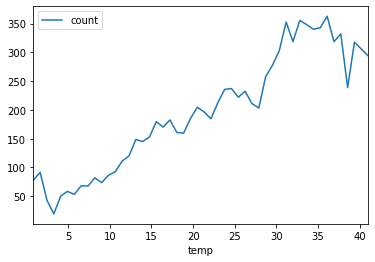

In [58]:
t.plot()
plt.show()

In [60]:
a = df.groupby('atemp')[['count']].mean()
a

,count
atemp,
0.760,1.000000
1.515,3.000000
2.275,38.000000
3.030,82.285714
3.790,39.062500
4.545,66.090909
5.305,63.200000
6.060,64.876712
6.820,56.380952


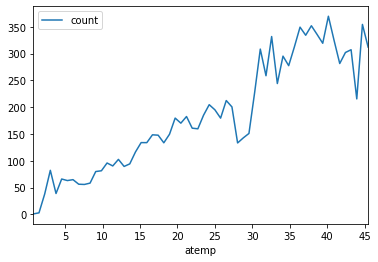

In [61]:
a.plot()
plt.show()